<a href="https://colab.research.google.com/github/DSpike/Iris_Plant_Classification/blob/main/Iris_Plant_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importing essential libraries (eg. Dataframe manipulation, N-Dimensial Array Manipulation,Data Preprocessing...)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing  import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras import regularizers



In [5]:
#Mounting my google drive containing my dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#reading my Iris data set using panda library and specifing the column names that are going to be used
columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"]
df=pd.read_csv('/content/drive/My Drive/Iris.csv',header=0,names=columns )

In [ ]:
df.shape

(150, 5)

In [7]:
#preprocessing of the raw data:removing target feature
x=df.drop('Species',axis=1,inplace=False).values
y=df['Species'].values


In [8]:
#Label encoding of the target three features namely;Iris-setosa, Iris-versicolor,Iris-virginica
from sklearn.preprocessing import LabelEncoder
labelEndoder=LabelEncoder()
y_LabelEncoded=labelEndoder.fit_transform(y)

In [9]:
#splitting of our data using 80/20 rule(i.e, training data=80%, test data=10%,validation data=10% )
from sklearn.model_selection import train_test_split
x_main,x_test,y_main,y_test=train_test_split(x,y_LabelEncoded,test_size=0.2,stratify=y, random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_test,y_test,test_size=0.5, stratify=y_test, random_state=42)

In [10]:
#inorder the ensure standard distribution of feature data
sandardize=StandardScaler()
x_train=sandardize.fit_transform(x_train)
x_val=sandardize.transform(x_val)
x_test=sandardize.transform(x_test)


In [15]:
#building our deepnn model
model = keras.Sequential([
    layers.Dense(128,input_shape=(4,), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Normalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Normalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Normalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Normalization(),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # 3 classes for the Iris dataset
])


In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization_4 (Normalization)      │ (None, 128)                 │             257 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization_5 (Normalization)      │ (None, 128)                 │             257 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization_6 (Normalization)      │ (None, 128)                 │             257 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization_7 (Normalization)      │ (None, 128)                 │             257 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,719 (596.58 KB)

 Trainable params: 50,563 (197.51 KB)

 Non-trainable params: 1,028 (4.03 KB)

 Optimizer params: 101,128 (395.04 KB)

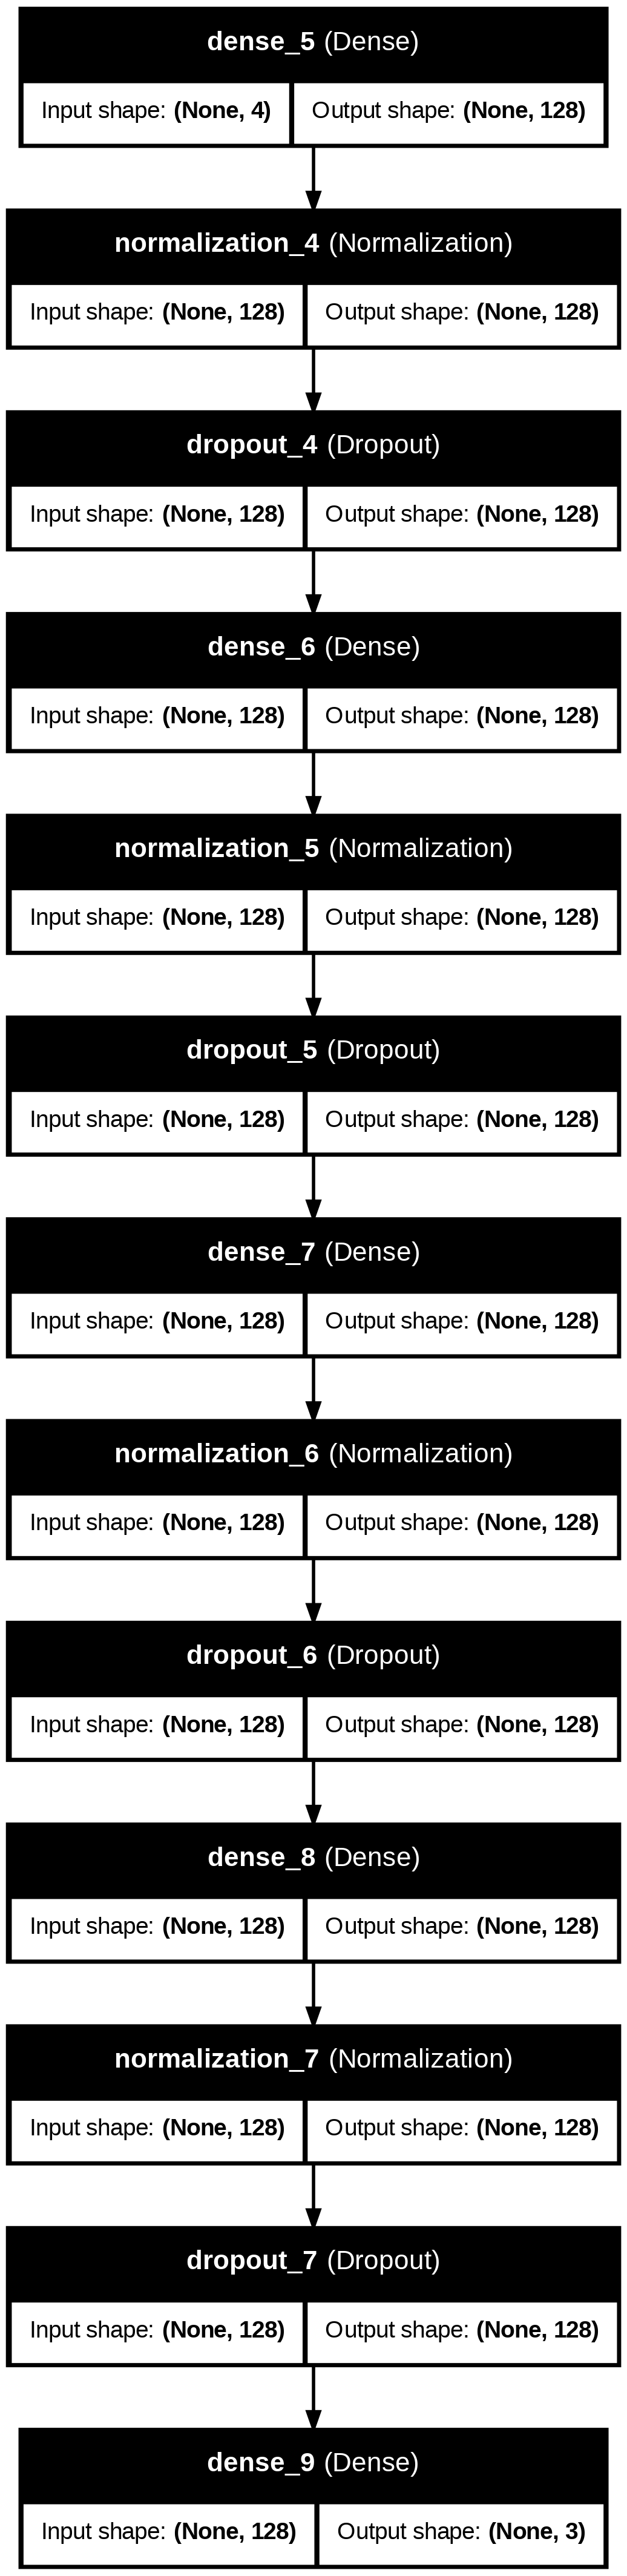

In [39]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#optimizer=keras.optimizers.Adam(learning_rate=0.001)

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train the model
history=model.fit(x_train, y_train, epochs=280, batch_size=10, validation_data=(x_val, y_val))

Epoch 1/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4778 - loss: 5.0058 - val_accuracy: 0.3333 - val_loss: 4.8801
Epoch 2/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.2778 - loss: 4.9476 - val_accuracy: 0.4000 - val_loss: 4.7808
Epoch 3/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3667 - loss: 4.8689 - val_accuracy: 0.6000 - val_loss: 4.6912
Epoch 4/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4444 - loss: 4.6595 - val_accuracy: 0.6000 - val_loss: 4.6041
Epoch 5/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5222 - loss: 4.6346 - val_accuracy: 0.6667 - val_loss: 4.5224
Epoch 6/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2444 - loss: 4.5298 - val_accuracy: 0.6667 - val_loss: 4.4446
Epoch 7/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4889 - loss: 4.4553 - val_accuracy: 0.6667 - val_loss: 4.3689
Epoch 8/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4778 - loss: 4.3775 - val_accuracy: 0.6667 - val_loss: 4

In [18]:
# Evaluate the model on the test set
from sklearn.metrics import accuracy_score
test_loss, test_accuracy = model.evaluate(x_test, y_test)
#print('Accuracy: %3f': % accuracy_score(y_test, test_accuracy))
print(f'Test Accuracy: {test_accuracy:.3f}')
print(f'Test Loss: {test_loss:.3f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.9667 - loss: 0.4389
Test Accuracy: 0.967
Test Loss: 0.439


In [19]:
# Make predictions

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
from sklearn.metrics import precision_score, recall_score, roc_auc_score, classification_report
# Compute evaluation metrics
precision = precision_score(y_test, predicted_classes, average='weighted')
recall = recall_score(y_test, predicted_classes, average='weighted')
roc_auc = roc_auc_score(pd.get_dummies(y_test), keras.utils.to_categorical(predicted_classes))

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'AUC: {roc_auc:.4f}')

# Display detailed classification report
print("\nIris Leaf Data Classification HW Report:")
print(classification_report(y_test, predicted_classes, target_names=labelEndoder.classes_))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Precision: 0.9697
Recall: 0.9667
AUC: 0.9750

Iris Leaf Data Classification HW Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


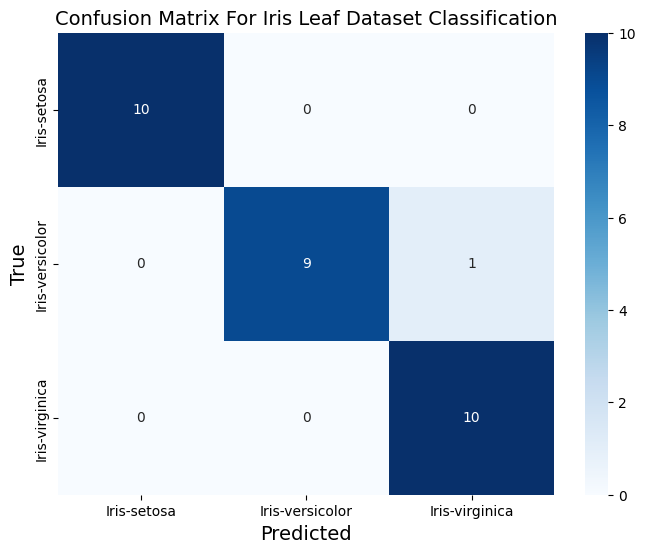

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
confused_matrix = confusion_matrix(y_test, predicted_classes)
print(confused_matrix)
# Plot the confusion matrix
#plt.figure(figsize=(8, 6))
#sns.heatmap(confused_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=x, yticklabels=y)
#plt.xlabel('Predicted')
#plt.ylabel('True')
#plt.title('Confusion Matrix')
#plt.show()

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confused_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=labelEndoder.classes_, yticklabels=labelEndoder.classes_) # xticklabels and yticklabels can be added if needed
plt.xlabel('Predicted',fontsize=14)
plt.ylabel('True',fontsize=14)
plt.title('Confusion Matrix For Iris Leaf Dataset Classification', fontsize=14)
plt.show()

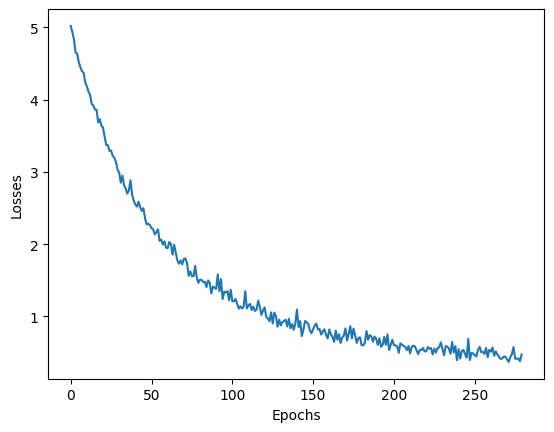

In [21]:
 Epochs =280
 losses = history.history['loss']
 plt. plot(range(Epochs),losses)
 plt.xlabel('Epochs')
 plt.ylabel('Losses')
 plt.show()

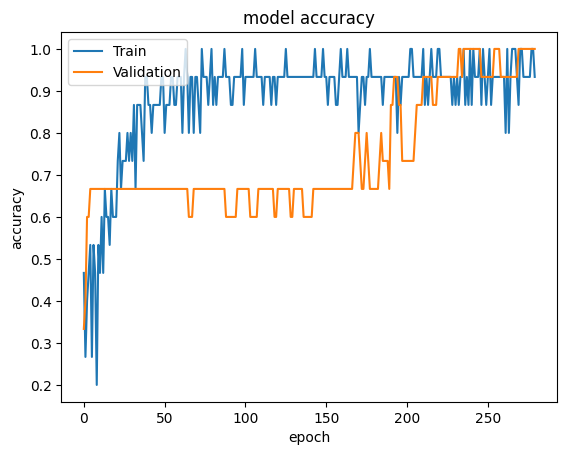

In [22]:
history.history.keys()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

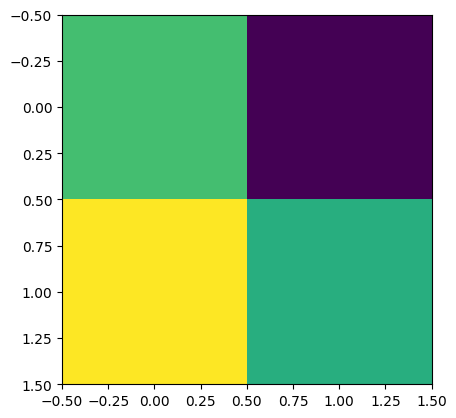

In [ ]:
import random
n = random.randint(0, len(x_test) - 1) # Remove the comma to assign an integer to n
plt.imshow(x_test[n].reshape(2,2)) # Reshape the 1D array to a 2D array. You may need to adjust the dimensions based on your image
plt.show()


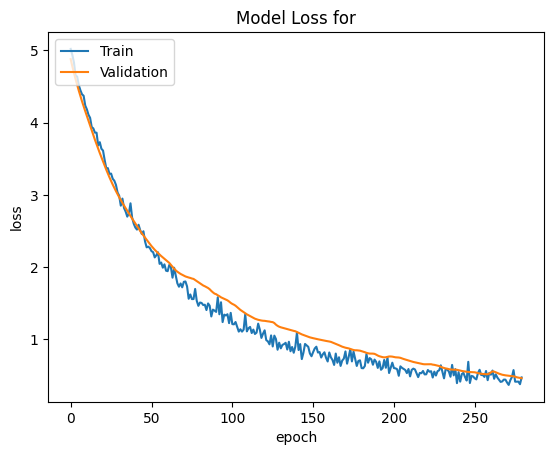

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss for')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

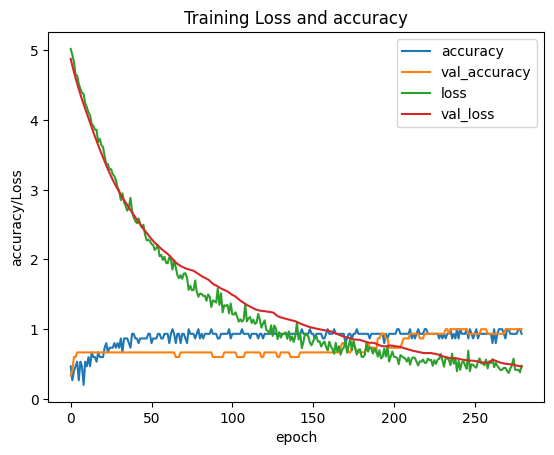

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


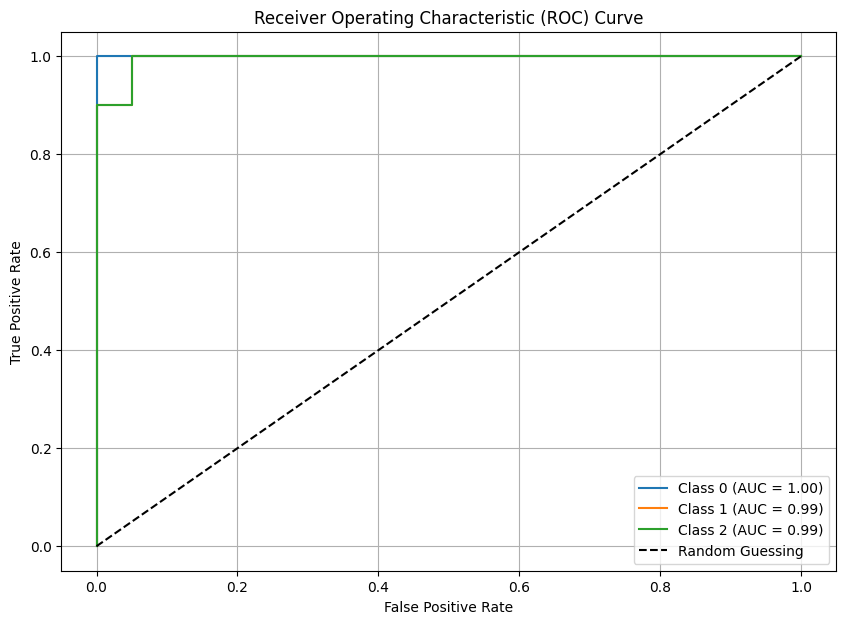

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Assuming y_test contains class labels (e.g., 0, 1, 2)
# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Set sparse_output=False for a dense output

# Fit the encoder to your data and transform y_test
y_binary = encoder.fit_transform(y_test.reshape(-1, 1)) # Reshape y_test to a 2D array

y_score = model.predict(x_test)

# Calculate ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(y_binary.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_binary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves
plt.figure(figsize=(10, 7))

for i in range(y_binary.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plotting the diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [37]:
# Predict probabilities
y_score = model.predict(x_test)

# Get predicted class labels
y_pred = np.argmax(y_score, axis=1)

# Create a DataFrame for visualization
df = pd.DataFrame(x_test, columns=df.feature_names)
df['Predicted Class'] = y_pred
df['Actual Class'] = np.argmax(y_test, axis=1)

# Plot class separation histograms
plt.figure(figsize=(15, 10))

for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=feature, hue='Predicted Class', multiple='stack', bins=10, kde=True)
    plt.title(f'Histogram of {feature} by Predicted Class')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


AttributeError: 'DataFrame' object has no attribute 'feature_names'